In [200]:
from rdkit import Chem
from rdkit.Chem import Draw

In [201]:
mols = [Chem.MolFromSmiles('NC(C)C(=O)' * x) for x in range(10)]
legends = ['mol-%d' % x for x in range(len(mols))]

In [202]:
# legends

In [203]:
# Draw.MolsToGridImage(mols, legends=legends)

In [224]:
s = "NC(C)C(=O)"
repeats = [[1], [0, 2], [3, 0, 4]]
mols_matrix = [[Chem.MolFromSmiles(s * count) for count in row] for row in repeats]
legends_matrix = [[str(count) for count in row] for row in repeats]

def highlightZeroIndexList(nunits):
    return [i * 5 for i in range(nunits)]

highlightAtomLists_matrix = [[highlightZeroIndexList(count) for count in row] for row in repeats]
highlightBondLists_matrix = [[highlightZeroIndexList(count) for count in row] for row in repeats]

highlightAtomLists_matrix
# mols_matrix


[[[0]], [[], [0, 5]], [[0, 5, 10], [], [0, 5, 10, 15]]]

In [206]:
highlightAtomLists_matrix

[[], [[0]], [[], [0, 5]], [[0, 5, 10], [], [0, 5, 10, 15]]]

In [209]:
legends_matrix

[['1'], ['0', '2'], ['3', '0', '4']]

In [210]:
mols_matrix[0]

In [211]:
legends_matrix[0]

['1']

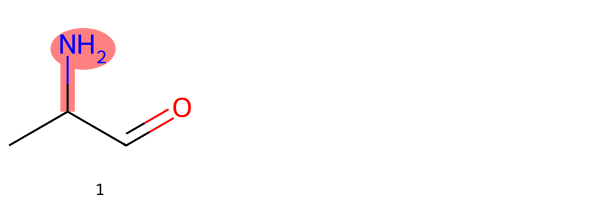

In [227]:
Draw.MolsToGridImage(mols_matrix[0], legends=legends_matrix[0], highlightAtomLists=highlightAtomLists_matrix[0], highlightBondLists=highlightAtomLists_matrix[0])

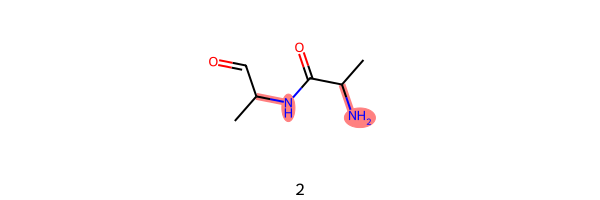

In [226]:
Draw.MolsToGridImage(mols_matrix[1], legends=legends_matrix[1], highlightAtomLists=highlightAtomLists_matrix[1], highlightBondLists=highlightAtomLists_matrix[1])

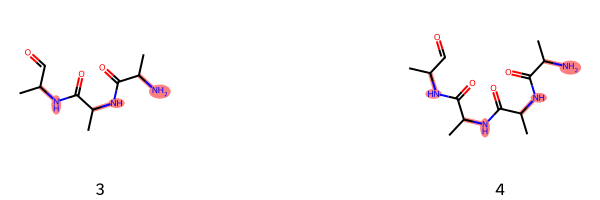

In [228]:
Draw.MolsToGridImage(mols_matrix[2], legends=legends_matrix[2], highlightAtomLists=highlightAtomLists_matrix[2], highlightBondLists=highlightAtomLists_matrix[2])